# EJERCICIOS

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization,Input,Flatten,Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import HeNormal,LecunNormal
from tensorflow.keras.activations import swish
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.layers import BatchNormalization


In [32]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

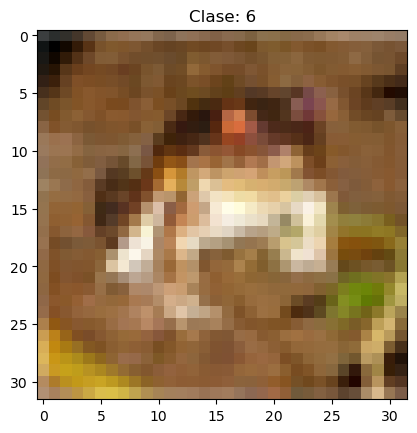

In [ ]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_temp, y_temp) = tf.keras.datasets.cifar10.load_data()

# Dividir los datos de entrenamiento en subconjuntos de entrenamiento y validación
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

# Mostrar una de las imágenes de entrenamiento
plt.imshow(x_train[0])  # Muestra la primera imagen del conjunto de entrenamiento
plt.title(f"Clase: {y_train[0][0]}")  # Título con la clase de la imagen
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [34]:
# Definir el modelo
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una
for _ in range(20):
    x = Dense(100, activation=swish, kernel_initializer=HeNormal())(x)

# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)
output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [35]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados = [{
            'Red neuronal normal': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 10.1857 - sparse_categorical_accuracy: 0.1799 - val_loss: 2.1126 - val_sparse_categorical_accuracy: 0.2174
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9059 - sparse_categorical_accuracy: 0.2978 - val_loss: 1.7979 - val_sparse_categorical_accuracy: 0.3374
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8235 - sparse_categorical_accuracy: 0.3360 - val_loss: 1.8475 - val_sparse_categorical_accuracy: 0.3220
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7646 - sparse_categorical_accuracy: 0.3599 - val_loss: 1.8106 - val_sparse_categorical_accuracy: 0.3430
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7319 - sparse_categorical_accuracy: 0.3738 - val_loss: 1.7369 - val_sparse_categorical_accuracy: 0.3826
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7114 - sparse_categorical_accuracy: 0.3847 - val_loss: 1

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [36]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Definir el optimizador Nadam con la tasa de aprendizaje actual
optimizer = Nadam(learning_rate=max_lr)

# Compilar el modelo
model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

# Entrenar el modelo y medir el tiempo de entrenamiento
start_time = time.time()
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), verbose=1,callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

# Obtener la mejor época considerando la detención temprana
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1

# Guardar los resultados
resultados.append({
    'Red neuronal normal con detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

print(resultados[1])



Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2.3053 - sparse_categorical_accuracy: 0.1019 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.0970
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0990 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1038
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1035 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1042
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0977 - val_loss: 2.3025 - val_sparse_categorical_accuracy: 0.1008
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.001, 'Entrenamiento sparse categorical accuracy': 0.10000000149011612, 'Validación sparse categorical accuracy': 0.09700000286102295, 'Tiempo total (s)': 14.911269187927246, 'Mejor época': 1}}


### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [37]:
# Definir el modelo con normalización de lotes
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una y normalización de lotes
for _ in range(20):
    x = Dense(100, activation=None, kernel_initializer=HeNormal())(x)  # Capa densa
    x = BatchNormalization()(x)  # Añadir normalización de lotes
    x = Activation('swish')(x)  # Añadir activación swish
# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)
output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model_norma = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model_norma.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_120 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_121 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_122 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_123 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_124 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_125 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 100)            │           40

 Total params: 508,210 (1.94 MB)

 Trainable params: 504,210 (1.92 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [38]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados_normalizados = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model_norma.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados_normalizados = [{
            'Red neuronal con normalización de lotes': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados_normalizados)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1000 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0970
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0991 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0970
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1006 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1008
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0998 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1008
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0982 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0970
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1001 - val_loss: 2.

In [39]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Entrenar el modelo con early stopping y medir el tiempo de entrenamiento
start_time = time.time()
history = model_norma.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), verbose=1, callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

# Obtener la mejor época considerando la detención temprana
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1


resultados_normalizados.append({
    'Red neuronal con normalización de lotes y detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

print(resultados_normalizados[1])


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 2.1815 - sparse_categorical_accuracy: 0.1770 - val_loss: 2.4643 - val_sparse_categorical_accuracy: 0.1964
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.0025 - sparse_categorical_accuracy: 0.2303 - val_loss: 3.8288 - val_sparse_categorical_accuracy: 0.0842
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.0232 - sparse_categorical_accuracy: 0.2079 - val_loss: 2.5628 - val_sparse_categorical_accuracy: 0.0958
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2369 - sparse_categorical_accuracy: 0.1566 - val_loss: 2.2943 - val_sparse_categorical_accuracy: 0.1556
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.1454 - sparse_categorical_accuracy: 0.1783 - val_loss: 2.4846 - val_sparse_categorical_accuracy: 0.0804
{'Red neuronal con normalización de lotes y detención temprana': {'Tasa de aprendizaje': 0.01, 'Entrenamiento sparse categorical accuracy': 0.10000000149011612, 'Va

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [40]:
# Definir el modelo con normalización de lotes
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una y normalización de lotes
for _ in range(20):
    x = Dense(100, activation=None, kernel_initializer=LecunNormal())(x)  # Capa densa
    x = Activation('selu')(x)  # Añadir activación swish
# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)
output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model_selu = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model_selu.summary()

# Estandarización de los datos de entrenamiento y prueba
mean_train = np.mean(x_train, axis=(0, 1, 2), keepdims=True)
std_train = np.std(x_train, axis=(0, 1, 2), keepdims=True)

# Normalizamos los datos de entrenamiento
x_train_standardized = (x_train - mean_train) / (std_train + 1e-7)  # Evitar división por cero

# Normalizamos los datos de prueba
x_test_standardized = (x_test - mean_train) / (std_train + 1e-7)  # Usamos la media y std de train

# Normalizamos los datos de validacion
x_val_standardized = (x_val - mean_train) / (std_train + 1e-7)  # Usamos la media y std de val

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_140 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_141 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_142 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_143 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_144 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_145 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_146 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_147 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_148 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_149 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_150 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 100)            │        10,10

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados_selu = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model_selu.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train_standardized, y_train, epochs=10, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados_selu = [{
            'Red neuronal con activacion selu': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados_selu)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0970
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1002 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1008
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0966 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0970
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0997 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1008
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.3025 - val_sparse_categorical_accuracy: 0.1042
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.

In [42]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Entrenar el modelo con early stopping y medir el tiempo de entrenamiento
start_time = time.time()
history = model_selu.fit(x_train_standardized, y_train, epochs=100, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1, callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

# Obtener la mejor época considerando la detención temprana
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1

resultados_selu.append({
    'Red neuronal con activacion selu y detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

print(resultados_selu[1])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1413184896.0000 - sparse_categorical_accuracy: 0.1011 - val_loss: 2.3368 - val_sparse_categorical_accuracy: 0.0956
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3233 - sparse_categorical_accuracy: 0.0996 - val_loss: 2.3157 - val_sparse_categorical_accuracy: 0.1038
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3247 - sparse_categorical_accuracy: 0.1008 - val_loss: 2.3749 - val_sparse_categorical_accuracy: 0.0972
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3293 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.3240 - val_sparse_categorical_accuracy: 0.0972
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3308 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3242 - val_sparse_categorical_accuracy: 0.0972
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3305 - sparse_categorical_accuracy: 0.1007 - val_loss: 2.3434 - val_sparse_categorical_accura

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [43]:
# Definir el modelo con normalización de lotes
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una y normalización de lotes
for _ in range(20):
    x = Dense(100, activation=None, kernel_initializer=LecunNormal())(x)  # Capa densa
    x = Activation('selu')(x)  # Añadir activación swish
# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)

# Añadir capa Dropout antes de la capa de salida (regularización)
x = Dropout(0.5)(x)  # Dropout con tasa del 50%

output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model_dropout = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model_dropout.summary()

# Estandarización de los datos de entrenamiento y prueba
mean_train = np.mean(x_train, axis=(0, 1, 2), keepdims=True)
std_train = np.std(x_train, axis=(0, 1, 2), keepdims=True)

# Normalizamos los datos de entrenamiento
x_train_standardized = (x_train - mean_train) / (std_train + 1e-7)  # Evitar división por cero

# Normalizamos los datos de prueba
x_test_standardized = (x_test - mean_train) / (std_train + 1e-7)  # Usamos la media y std de train

# Normalizamos los datos de validacion
x_val_standardized = (x_val - mean_train) / (std_train + 1e-7)  # Usamos la media y std de val

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_160 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_161 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_233 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_162 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_234 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_163 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_235 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_164 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_236 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_165 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_237 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_166 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_167 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_168 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_240 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_169 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_170 (Activation)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 100)            │        10,10

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados_dropout = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model_dropout.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train_standardized, y_train, epochs=10, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados_dropout = [{
            'Red neuronal con activacion selu': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados_dropout)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0974 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1038
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1011 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0972
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1004 - val_loss: 2.3025 - val_sparse_categorical_accuracy: 0.0956
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1001 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1042
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.3025 - val_sparse_categorical_accuracy: 0.0970
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1022 - val_loss: 2.

In [45]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Entrenar el modelo con early stopping y medir el tiempo de entrenamiento
start_time = time.time()
history = model_dropout.fit(x_train_standardized, y_train, epochs=100, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1, callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

# Obtener la mejor época considerando la detención temprana
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1

resultados_dropout.append({
    'Red neuronal con activacion selu y detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

print(resultados_dropout[1])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 50716848685056.0000 - sparse_categorical_accuracy: 0.1046 - val_loss: 2.7476 - val_sparse_categorical_accuracy: 0.1008
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.7998 - sparse_categorical_accuracy: 0.1035 - val_loss: 2.9504 - val_sparse_categorical_accuracy: 0.1008
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.7835 - sparse_categorical_accuracy: 0.1053 - val_loss: 2.8604 - val_sparse_categorical_accuracy: 0.1008
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.8866 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.8826 - val_sparse_categorical_accuracy: 0.1008
{'Red neuronal con activacion selu y detención temprana': {'Tasa de aprendizaje': 0.01, 'Entrenamiento sparse categorical accuracy': 0.10000000149011612, 'Validación sparse categorical accuracy': 0.10080000013113022, 'Tiempo total (s)': 16.079930067062378, 'Mejor época': 1}}
